# First Steps and EDA

# Business Understanding

In this case study for iFood, Brazil's leading food delivery app, the task is to analyze a dataset containing customer information and their interactions with marketing campaigns. The goal is to uncover business insights, propose data-driven actions to optimize campaign results, and develop a predictive model to maximize profits for an upcoming marketing campaign. This case is divided in 3 different notebooks: Exploratory Data Analysis (EDA), Customer Segmentation and Predictive Classification Model.

# Data Understanding

Exploratory Data Analysis (EDA) is the process of examining and visualizing data to understand its main characteristics. It is crucial because it helps identify patterns, anomalies, and insights, ensuring that subsequent analyses or models are based on a solid understanding of the data. This foundation aids in making informed decisions and improving data quality.

## Load the Dataset

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ydata_profiling import ProfileReport

In [3]:
data = "../data/ml_project1_data.csv"

dfi = pd.read_csv(data)

dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Data Dictionary

Personal data

- `ID`: Unique customer identifier
- `Year_Birth`: Year of birth of the customer
- `Education`: Customer education level
- `Marital_Status`: Marital status of the client
- `Income`: Annual income of the client’s family
- `Kidhome`: Number of children in the customer's home
- `Teenhome`: Number of teenagers in the client's home
- `Dt_Customer`: Date of registration of the customer with the company
- `Recency`: Number of days since the customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

Product data

- `MntWines`: Amount spent on wine in the last 2 years
- `MntFruits`: Amount spent on fruits in the last 2 years
- `MntMeatProducts`: Amount spent on meat in the last 2 years
- `MntFishProducts`: Amount spent on fish in the last 2 years
- `MntSweetProducts`: Amount spent on sweets in the last 2 years
- `MntGoldProds`: Amount spent on *gold* products in the last 2 years

Purchase location data

- `NumWebPurchases`: Number of purchases made through the company website
- `NumCatalogPurchases`: Number of purchases made using a catalog
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to the company website in the last month

Campaign data

- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- `Response` (*target*): 1 if the customer accepted the offer in the last campaign (pilot), 0 otherwise
- `Z_CostContact`: Cost of contacting customers for the pilot
- `Z_Revenue`: Revenue from the new gadget (customer contact)

## Data Information

In [4]:
print('The dimension of the data is :', dfi.shape)

The dimension of the data is : (2240, 29)


In [5]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)

# Display the description of the DataFrame
display(dfi.describe())

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00   
mean   5592.16     1968.81  52247.25     0.44      0.51    49.11    303.94   
std    3246.66       11.98  25173.08     0.54      0.54    28.96    336.60   
min       0.00     1893.00   1730.00     0.00      0.00     0.00      0.00   
25%    2828.25     1959.00  35303.00     0.00      0.00    24.00     23.75   
50%    5458.50     1970.00  51381.50     0.00      0.00    49.00    173.50   
75%    8427.75     1977.00  68522.00     1.00      1.00    74.00    504.25   
max   11191.00     1996.00 666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00          1725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count       2240.00            2240.00          2240.00              2240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count       2240.00       2240.00       2240.00   2240.00        2240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count    2240.00   2240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

Based on the description, some initial observations can be made:
- The minimum value of the `Year_birth` column should be noted.
- The maximum value of the `Income` column is significant.
- The standard deviation (std) in `Z_CostContact` and `Z_Revenue` is 0, and all quartiles have the same value. These are characteristics of columns with unique values, indicating that these two columns won't add much value. Therefore, these columns should be dropped.
- The `Response` column has a mean value indicating that 15% of the entries are 1s.
- The `ID` column, representing unique customer IDs, does not reflect consecutive data collection, leading to discrepancies. Since it distorts the data and adds no value to the analysis, this feature also will be droped.

In [7]:
# Display the description of the DataFrame, excluding numerical columns
df_description_non_numeric = dfi.describe(include=[object, 'category'])
display(df_description_non_numeric)

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

- `Marital_Status` has too many categories.
- `Dt_Customer` is of object type and needs to be converted to a proper date format.

In [8]:
# Calculate and display the number of missing values in each column
missing_values = dfi.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


- `Income` has some null values

## Data Exploration - ydata-profiling

In [9]:
profile = ProfileReport(dfi)

profile.to_file("../report/eda_prof.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Quality Verification

Based on the analysis with ydata_profiling, the following observations can be noted:
- Some entries in the `Year_Birth` seemed erroneous or incongruent, indicating possible outliers.
- `Education` and `Marital_Status` showed significant segmentation, suggesting the need for consolidation of categories to simplify analysis.
- `Income` also presented potential outliers.
- `Kidhome` and `Teenhome` could be combined into a single `Children` variable.
- The `Dt_Customer` variable required type transformation for proper analysis, and the campaign duration indicated nearly two years of customer registrations.
- A uniform distribution was observed in `Recency`
- Spending patterns in `MntS` revealed most customers spent minimal amounts, with spending decreasing as amounts increased.
- `NumDealsPurchases` and `AcceptedCmp` variables indicated specific customer behaviours and campaign efficacy, respectively. 

# Data Preparation

## Removing Missing Values

In [10]:
# Drop rows with any missing values
dfi.dropna(inplace=True)

dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

- Removing null values from a dataset is crucial for ensuring data integrity and accuracy, as it prevents skewed results and errors in statistical analyses and machine learning models. Null values can disrupt calculations and model performance, leading to unreliable outcomes.

## Converting Column Format

In [11]:
# Convert the "Dt_Customer" column to datetime format
dfi["Dt_Customer"] = pd.to_datetime(dfi["Dt_Customer"], format="%Y-%m-%d")

dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation       Together 71613.00        0         0   
3  6182        1984  Graduation       Together 26646.00        1         0   
4  5324        1981         PhD        Married 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [12]:
# Get descriptive statistics for the "Dt_Customer" column
description_dt = dfi["Dt_Customer"].describe()
description_dt

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

- The column `Dt_Customer` was transformed into a datetime format, representing two years of customer subscription data.

## Creating New Columns

In [13]:
# Calculate the number of days each customer has been enrolled
max_date = dfi["Dt_Customer"].max()
dfi["DaysEnrolled"] = (max_date - dfi["Dt_Customer"]).dt.days

# Calculate the number of years each customer has been enrolled
dfi["YearsEnrolled"] = (dfi["DaysEnrolled"] // 365)

dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation       Together 71613.00        0         0   
3  6182        1984  Graduation       Together 26646.00        1         0   
4  5324        1981         PhD        Married 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysEnrolled  YearsEnrolled  
0              3         11         1           663              1  
1              3         11         0           113              0  
2              3         11         0           312              0  
3              3         11         0           139              0  
4              3         11         0           161              0

- Based on `Dt_Customer` was created `DaysEnrolled` to represent the number of days a customer has been subscribed, and `YearsEnrolled` to categorize the subscription period into 0, 1, or 2 years.


In [14]:
dfi["YearsEnrolled"].value_counts()

YearsEnrolled
0    1144
1    1072
Name: count, dtype: int64

In [15]:
# Calculate the age of each customer
current_year = dfi["Dt_Customer"].max().year
dfi["Age"] = current_year - dfi["Year_Birth"]

# Assign age groups based on the age of each customer
age_bins = [18, 25, 44, 64, dfi["Age"].max()]
age_labels = ["18-25", "26-44", "45-64", "65+"]
dfi["AgeGroup"] = pd.cut(dfi["Age"], bins=age_bins, labels=age_labels, include_lowest=True)

dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation       Together 71613.00        0         0   
3  6182        1984  Graduation       Together 26646.00        1         0   
4  5324        1981         PhD        Married 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysEnrolled  YearsEnrolled  Age  \
0              3         11         1           663              1   57   
1              3         11         0           113              0   60   
2              3         11         0           312              0   49   
3              3         11         0           139              0   30   
4              3         11         0           161              0   33   

  AgeGroup  
0    45-64  
1    45-64  
2    45-64  
3    26-44  
4    26-44

- The age of customers was calculated using `Year_Birth` and the maximum year in the dataset (2014), and they were grouped into four age categories: 
    - Young Adults: 18-25
    - Adults: 26-44
    - Middle-Aged Adults: 45-64
    - Older Adults: 65+

In [16]:
dfi["AgeGroup"].value_counts()

AgeGroup
26-44    1062
45-64     955
65+       109
18-25      90
Name: count, dtype: int64

In [17]:
# Calculate the total amount spent on all products
dfi["MntTotal"] = dfi[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

# Calculate the total amount spent on regular products (excluding gold products)
dfi["MntRegProds"] = dfi["MntTotal"] - dfi["MntGoldProds"]

dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation       Together 71613.00        0         0   
3  6182        1984  Graduation       Together 26646.00        1         0   
4  5324        1981         PhD        Married 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysEnrolled  YearsEnrolled  Age  \
0              3         11         1           663              1   57   
1              3         11         0           113              0   60   
2              3         11         0           312              0   49   
3              3         11         0           139              0   30   
4              3         11         0           161              0   33   

  AgeGroup  MntTotal  MntRegProds  
0    45-64      1617         1529  
1    45-64        27           21  
2    45-64       776          734  
3    26-44        53           48  
4    26-44       422          407

- Some `Mnt` columns were created:
    - `MntRegProds`: This likely represents regular products and includes `MntWines`, `MntFruits`, `MntMeat`, `MntFish`, and `MntSweet`
    - `MntTotal`: The total sum of all product

In [18]:
# Calculate the total number of children at home
dfi["NbChildren"] = dfi["Kidhome"] + dfi["Teenhome"]

# Indicate the presence of children at home (0 if none, 1 if any)
dfi["ChildrenPresence"] = dfi["NbChildren"].apply(lambda count: 1 if count > 0 else 0)

dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation       Together 71613.00        0         0   
3  6182        1984  Graduation       Together 26646.00        1         0   
4  5324        1981         PhD        Married 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysEnrolled  YearsEnrolled  Age  \
0              3         11         1           663              1   57   
1              3         11         0           113              0   60   
2              3         11         0           312              0   49   
3              3         11         0           139              0   30   
4              3         11         0           161              0   33   

  AgeGroup  MntTotal  MntRegProds  NbChildren  ChildrenPresence  
0    45-64      1617         1529           0                 0  
1    45-64        27           21           2                 1  
2    45-64       776          734           0                 0  
3    26-44        53           48           1                 1  
4    26-44       422          407           1                 1

- Also was introduced:
    - `NbChildren` to sum `Kidhome` and `Teenhome`
    - A flag column `ChildrenPresence` to indicate if a customer has children

In [19]:
# Replace various marital statuses with simplified categories
marital_status_mapping = {
    "Together": "HasPartner",
    "Married": "HasPartner",
    "Divorced": "Single",
    "Widow": "Single",
    "Single": "Single",
    "Alone": "Single",
    "Absurd": "Single",
    "YOLO": "Single"
}
dfi["Marital_Status"] = dfi["Marital_Status"].replace(marital_status_mapping)

# Count the occurrences of each simplified marital status
marital_status_counts = dfi["Marital_Status"].value_counts()
marital_status_counts

Marital_Status
HasPartner    1430
Single         786
Name: count, dtype: int64

- The `Marital_Status` column was simplified to "Has Partner" or "Single" based on the assumption that consumer behavior varies between those living with a partner and those who are single.


In [20]:
# Count the occurrences of each education level
education_counts = dfi["Education"].value_counts()
education_counts

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

- It was decided not to modify the education scale due to varying international definitions.

In [21]:
# Calculate the total number of accepted campaigns
dfi["AcceptedCmpTotal"] = dfi[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis=1)

# Indicate whether any campaign was accepted (0 if none, 1 if any)
dfi["AcceptedSomeCmp"] = dfi["AcceptedCmpTotal"].apply(lambda count: 1 if count > 0 else 0)

# Count the occurrences of each total number of accepted campaigns
accepted_cmp_total_counts = dfi["AcceptedCmpTotal"].value_counts()

# Count the occurrences of whether any campaign was accepted
accepted_some_cmp_counts = dfi["AcceptedSomeCmp"].value_counts()

accepted_cmp_total_counts, accepted_some_cmp_counts

(AcceptedCmpTotal
 0    1757
 1     323
 2      81
 3      44
 4      11
 Name: count, dtype: int64,
 AcceptedSomeCmp
 0    1757
 1     459
 Name: count, dtype: int64)

- `AcceptedCmpTotal`: Combined the Accepted Campaign columns to reflect the total number of accepted campaigns.
- `AcceptedSomeCmp`: Created this column to indicate whether any campaign was accepted (0 if none, 1 if any).

In [22]:
# Select columns whose names start with "Num"
num_columns = dfi.loc[:, dfi.columns.str.startswith("Num")]
num_columns

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  
0                     4                  7  
1                     2                  5  
2                    10                  4  
3                     4                  6  
4                     6                  5  
...                 ...                ...  
2235                  4                  5  
2236                  5                  7  
2237                 13                  6  
2238                 10                  3  
2239                  4                  7  

[2216 rows x 5 columns]

In [23]:
# Calculate the total number of purchases
dfi["NumTotalPurchases"] = dfi[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum(axis=1)

# Count the occurrences of each total number of purchases
total_purchases_counts = dfi["NumTotalPurchases"].value_counts()
total_purchases_counts

NumTotalPurchases
4     200
6     188
5     179
7     127
3     125
18    102
14     98
16     98
17     88
20     85
21     85
19     85
15     83
11     77
13     75
22     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
29      6
0       6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64

- Independent columns such as `NumDealsPurchases` and `NumWebVisitsMonth` remained unchanged.
- The columns `NumWebPurchases`, `NumCatalogPurchases`, and `NumStorePurchases` were aggregated into a new column, `NumTotalPurchases`s.

In [24]:
dfi.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation     HasPartner 71613.00        0         0   
3  6182        1984  Graduation     HasPartner 26646.00        1         0   
4  5324        1981         PhD     HasPartner 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysEnrolled  YearsEnrolled  Age  \
0              3         11         1           663              1   57   
1              3         11         0           113              0   60   
2              3         11         0           312              0   49   
3              3         11         0           139              0   30   
4              3         11         0           161              0   33   

  AgeGroup  MntTotal  MntRegProds  NbChildren  ChildrenPresence  \
0    45-64      1617         1529           0                 0   
1    45-64        27           21           2                 1   
2    45-64       776          734           0                 0   
3    26-44        53           48           1                 1   
4    26-44       422          407           1                 1   

   AcceptedCmpTotal  AcceptedSomeCmp  NumTotalPurchases  
0                 0                0                 22  
1                 0                0                  4  
2                 0                0                 20  
3                 0                0                  6  
4                 0                0                 14

In [25]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

- These transformations and new columns offer multiple perspectives, enhancing the comprehensiveness of the exploratory data analysis.

## Outlier Detection and Removal Process

In [26]:
# Ensure inline plotting
%matplotlib inline

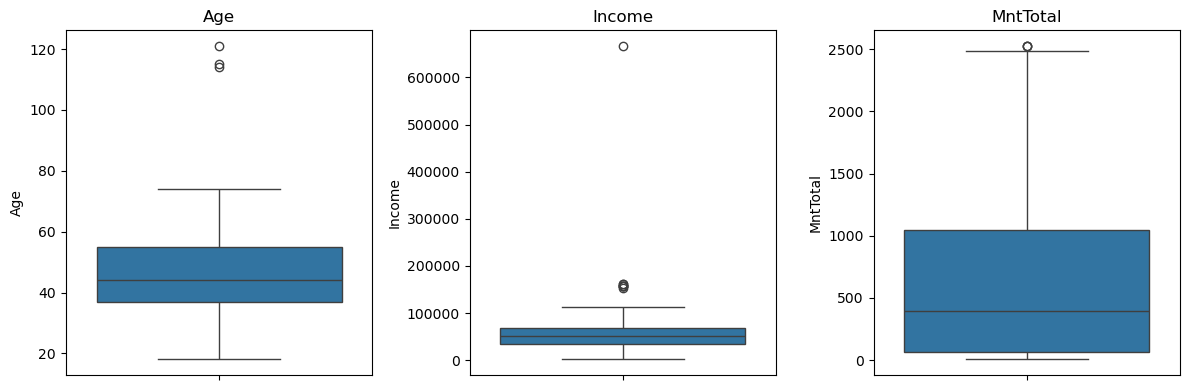

In [27]:
# Define columns to search for outliers
outlier_columns = ["Age", "Income", "MntTotal"]

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True)

# Plot boxplots for each specified column
for ax, column in zip(axs, outlier_columns):
    sns.boxplot(y=dfi[column], ax=ax)
    ax.set_title(column)

plt.show()

In [28]:
def inspect_outliers(df, col, whisker_width=1.5):
    """
    Identify outliers in a DataFrame column based on the interquartile range (IQR) method.

    Parameters:
    df (pd.DataFrame): The DataFrame to inspect.
    col (str): The column name to inspect for outliers.
    whisker_width (float): The width of the whiskers used to define outliers. Default is 1.5.

    Returns:
    pd.DataFrame: A DataFrame containing the outliers.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # Compute the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - whisker_width * iqr
    upper_bound = q3 + whisker_width * iqr
    
    # Return the rows that are outliers
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Inspect and display outliers in the "Age" column
age_outliers = inspect_outliers(dfi, "Age")
print("Age Outliers:")
display(age_outliers)

# Inspect and display outliers in the "Income" column
income_outliers = inspect_outliers(dfi, "Income")
print("Income Outliers:")
display(income_outliers)

# Inspect and display outliers in the "MntTotal" column
mnt_total_outliers = inspect_outliers(dfi, "MntTotal")
print("MntTotal Outliers:")
display(mnt_total_outliers)

Age Outliers:


ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single 36640.00        1         0   
239  11004        1893  2n Cycle         Single 60182.00        0         1   
339   1150        1899       PhD     HasPartner 83532.00        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  2013-09-26       99        15          6                8   
239  2014-05-17       23         8          0                5   
339  2013-09-26       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
192             0             0         1              3         11         0   
239             0             0         0              3         11         0   
339             0             0         0              3         11         0   

     DaysEnrolled  YearsEnrolled  Age AgeGroup  MntTotal  MntRegProds  \
192           276              0  114      65+        65           40   
239            43              0  121      65+        22           20   
339           276              0  115      65+      1853         1629   

     NbChildren  ChildrenPresence  AcceptedCmpTotal  AcceptedSomeCmp  \
192           1                 1                 0                0   
239           1                 1                 0                0   
339           0                 0                 1                1   

     NumTotalPurchases  
192                  5  
239                  3  
339                 14

Income Outliers:


ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD     HasPartner 157243.00        0   
617    1503        1976         PhD     HasPartner 162397.00        1   
655    5555        1975  Graduation         Single 153924.00        0   
687    1501        1982         PhD     HasPartner 160803.00        0   
1300   5336        1971      Master     HasPartner 157733.00        1   
1653   4931        1977  Graduation     HasPartner 157146.00        0   
2132  11181        1949         PhD     HasPartner 156924.00        0   
2233   9432        1977  Graduation     HasPartner 666666.00        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164          1  2014-03-01       98        20          2             1582   
617          1  2013-06-03       31        85          1               16   
655          0  2014-02-07       81         1          1                1   
687          0  2012-08-04       21        55         16             1622   
1300         0  2013-06-04       37        39          1                9   
1653         0  2013-04-29       13         1          0             1725   
2132         0  2013-08-29       85         2          1                2   
2233         0  2013-06-02       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
2132                0                    0                  0   
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
164              0             0         0              3         11   
617              0             0         0              3         11   
655              0             0         0              3         11   
687              0             0         0              3         11   
1300             0             0         0              3         11   
1653             0             0         0              3         11   
2132             0             0         0              3         11   
2233             0             0         0              3         11   

      Response  DaysEnrolled  YearsEnrolled  Age AgeGroup  MntTotal  \
164          0           120              0 

MntTotal Outliers:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1179  5735        1991      Master         Single 90638.00        0         0   
1492  1763        1988  Graduation     HasPartner 87679.00        0         0   
1572  5350        1991      Master         Single 90638.00        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1179  2014-02-13       29      1156        120              915   
1492  2013-07-27       62      1259        172              815   
1572  2014-02-13       29      1156        120              915   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1179               94               144            96                  1   
1492               97               148            33                  1   
1572               94               144            96                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1179                3                    4                 10   
1492                7                   11                 10   
1572                3                    4                 10   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1179                  1             0             0             1   
1492                  4             1             0             1   
1572                  1             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
1179             0             0         0              3         11   
1492             1             0         0              3         11   
1572             0             0         0              3         11   

      Response  DaysEnrolled  YearsEnrolled  Age AgeGroup  MntTotal  \
1179         0           136              0   23    18-25      2525   
1492         1           337              0   26    26-44      2524   
1572         1           136              0   23    18-25      2525   

      MntRegProds  NbChildren  ChildrenPresence  AcceptedCmpTotal  \
1179         2429           0                 0                 1   
1492         2491           0                 0                 3   
1572         2429           0                 0                 1   

      AcceptedSomeCmp  NumTotalPurchases  
1179                1                 17  
1492                1                 28  
1572                1                 17

- `Age`: Three customers had outlier ages that appear unrealistic, likely due to registration errors. Given the small number of these records, they will be removed from the dataset.

- `Income`: Among the eight outliers identified, only one seems inconsistent. However, to maintain consistency in the analysis, all eight outliers will be removed, despite some being plausible high-income earners.

- `MntTotal`: The three outliers in MntTotal are close to the maximum value and will therefore be retained in the dataset.

In [29]:
# Remove outliers from the "Age" column
dfi = dfi.drop(inspect_outliers(dfi, "Age").index)

# Remove outliers from the "Income" column
dfi = dfi.drop(inspect_outliers(dfi, "Income").index)

dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-null   i

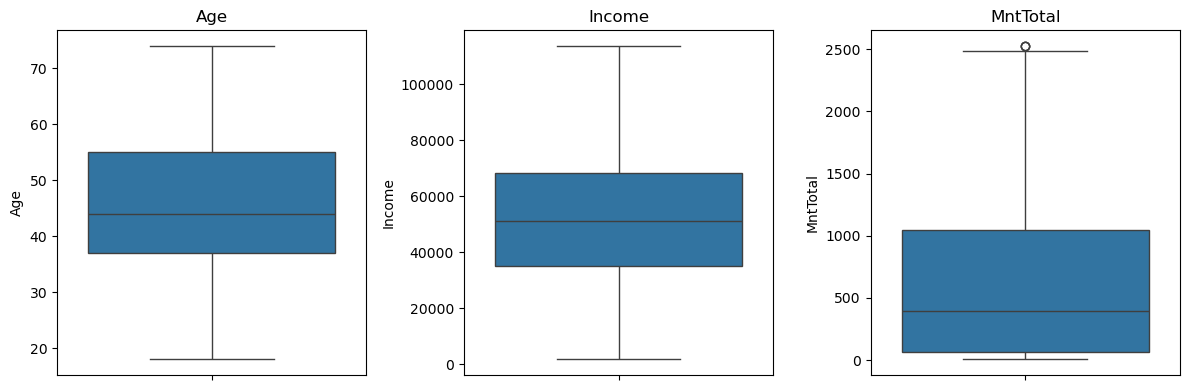

In [30]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True)

# Plot boxplots for each specified column
for ax, column in zip(axs, outlier_columns):
    sns.boxplot(y=dfi[column], ax=ax)
    ax.set_title(column)

plt.show()

## Feature Removal

In [31]:
# Drop specified columns from the DataFrame
columns_to_drop = ["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue"]
dfi.drop(columns=columns_to_drop, inplace=True)

dfi.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single 58138.00        0         0       58       635   
1  Graduation         Single 46344.00        1         1       38        11   
2  Graduation     HasPartner 71613.00        0         0       26       426   
3  Graduation     HasPartner 26646.00        1         0       26        11   
4         PhD     HasPartner 58293.00        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  DaysEnrolled  \
0             0             0             0         0         1           663   
1             0             0             0         0         0           113   
2             0             0             0         0         0           312   
3             0             0             0         0         0           139   
4             0             0             0         0         0           161   

   YearsEnrolled  Age AgeGroup  MntTotal  MntRegProds  NbChildren  \
0              1   57    45-64      1617         1529           0   
1              0   60    45-64        27           21           2   
2              0   49    45-64       776          734           0   
3              0   30    26-44        53           48           1   
4              0   33    26-44       422          407           1   

   ChildrenPresence  AcceptedCmpTotal  AcceptedSomeCmp  NumTotalPurchases  
0                 0                 0                0                 22  
1                 1                 0                0                  4  
2                 0                 0                0                 20  
3                 1                 0                0                  6  
4                 1                 0                0                 14

In [32]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2205 non-null   object  
 1   Marital_Status       2205 non-null   object  
 2   Income               2205 non-null   float64 
 3   Kidhome              2205 non-null   int64   
 4   Teenhome             2205 non-null   int64   
 5   Recency              2205 non-null   int64   
 6   MntWines             2205 non-null   int64   
 7   MntFruits            2205 non-null   int64   
 8   MntMeatProducts      2205 non-null   int64   
 9   MntFishProducts      2205 non-null   int64   
 10  MntSweetProducts     2205 non-null   int64   
 11  MntGoldProds         2205 non-null   int64   
 12  NumDealsPurchases    2205 non-null   int64   
 13  NumWebPurchases      2205 non-null   int64   
 14  NumCatalogPurchases  2205 non-null   int64   
 15  NumStorePurchases    2205 

- Some columns were removed as they did not contribute meaningful information to the study:
  - `ID`: A unique identifier
  - `Year_Birth`: Transformed into `Age`
  - `Dt_Customer`: Replaced by derived columns
  - Constant-value columns: `Z_CostContact` and `Z_Revenue`

## Saving the Cleaned Dataset

In [33]:
dfi.to_csv("../data/ml_project_data_clean.csv", index=False)

## Inspecting the Cleaned Dataset

In [34]:
# Set display options for floating point format and maximum number of columns
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None
):
    # Display the descriptive statistics of the DataFrame
    display(dfi.describe())

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2205.00  2205.00   2205.00  2205.00   2205.00    2205.00   
mean   51622.09     0.44      0.51    49.01    306.16      26.40   
std    20713.06     0.54      0.54    28.93    337.49      39.78   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35196.00     0.00      0.00    24.00     24.00       2.00   
50%    51287.00     0.00      0.00    49.00    178.00       8.00   
75%    68281.00     1.00      1.00    74.00    507.00      33.00   
max   113734.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2205.00          2205.00           2205.00       2205.00   
mean            165.31            37.76             27.13         44.06   
std             217.78            54.82             41.13         51.74   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         25.00   
75%             232.00            50.00             34.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2205.00          2205.00              2205.00   
mean                2.32             4.10                 2.65   
std                 1.89             2.74                 2.80   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2205.00            2205.00       2205.00       2205.00   
mean                5.82               5.34          0.07          0.07   
std                 3.24               2.41          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count       2205.00       2205.00       2205.00   2205.00   2205.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       DaysEnrolled  YearsEnrolled     Age  MntTotal  MntRegProds  NbChildren  \
count       2205.00        2205.00 2205.00   2205.00      2205.00     2205.00   
mean         353.72           0.48   45.10    606.82       562.76        0.95   
std          202.56           0.50   11.71    601.68       575.94        0.75   
min            0.00           0.00   18.00      5.00         4.00        0.00   
25%          180.00           0.00   37.00     69.00        56.00        0.00   
50%          356.00           0.00   44.00    397.00       343.00        1.00   
75%          529.00           1.00   55.00   1047.00       964.00        1.00   
max          699.00           1.00   74.00   2525.00      2491.00        3.00   

       ChildrenPresence  AcceptedCmpTotal  AcceptedSomeCmp  NumTotalPurchases  

In [35]:
# Display descriptive statistics of non-numeric columns in the DataFrame
dfi.describe(exclude="number")

Education Marital_Status AgeGroup
count         2205           2205     2205
unique           5              2        4
top     Graduation     HasPartner    26-44
freq          1113           1422     1055

- During inspection, several observations were noted:
    - MntTotal and `MntRegularProds` had similar values, indicating that `MntGoldProds` played a minor role.
    - The dataset showed that customers typically had up to three children.
    - Despite five campaigns, the maximum number of campaigns accepted by any customer was four.
    - Most customers did not accept any campaigns, as indicated by the zero quartiles.
    - The highest `NumTotalPurchases` was 32, reflecting the total purchases across all platforms.orms.

# Deeper EDA

## Parirplots

A pairplot is a powerful data visualization tool provided by the seaborn library in Python. It is used to visualize the relationships between pairs of variables in a dataset, as well as the distribution of individual variables. Pairplots are particularly useful for exploring the relationships between multiple variables at once, making them a popular tool in exploratory data analysis (EDA).

### Analysis Columns

In [36]:
# Define the columns for analysis
analysis_columns = [
    "Income",
    "Recency",
    "DaysEnrolled",
    "Age",
    "MntTotal",
]

The columns chosen for analysis are:
- `Income`: This column represents the income of the customers. It's important to analyze this as it could influence spending behavior.
- `Recency`: This column represents the number of days since the customer last made a purchase. It's useful for understanding customer engagement.
- `DaysEnrolled`: This column represents the number of days the customer has been enrolled in the system. It can give insights into customer loyalty and retention.
- `Age`: This column represents the age of the customers. Analyzing age can help identify different spending patterns across age groups.
- `MntTotal`: This column represents the total amount spent by the customer. It's critical for understanding the overall spending behavior of customers.

In [37]:
# List of hue columns to create pair plots
hue_columns = [
    "ChildrenPresence",
    "Marital_Status",
    "Education",
    "AcceptedSomeCmp",
    "Response",
    "AgeGroup"
]

The hue columns are categorical variables that are used to color-code the data points in the pair plots. This helps in understanding how different categories within these variables influence the relationships between the analysis columns.
- `ChildrenPresence`: Indicates whether a customer has children at home or not. This can affect spending patterns and preferences.
- `Marital_Status`: Represents the marital status of the customers. Different marital statuses might influence spending behavior.
- `Education`: Represents the education level of the customers. Education can impact income and spending habits.
- `AcceptedSomeCmp`: Indicates whether a customer has accepted any campaign offers. This can show how responsive different customer segments are to marketing efforts.
- `Response`: Represents the response to the last campaign. Useful for analyzing the effectiveness of campaigns.
- `AgeGroup`: Categorizes customers into different age groups. Helps in understanding age-based spending patterns and preferences.

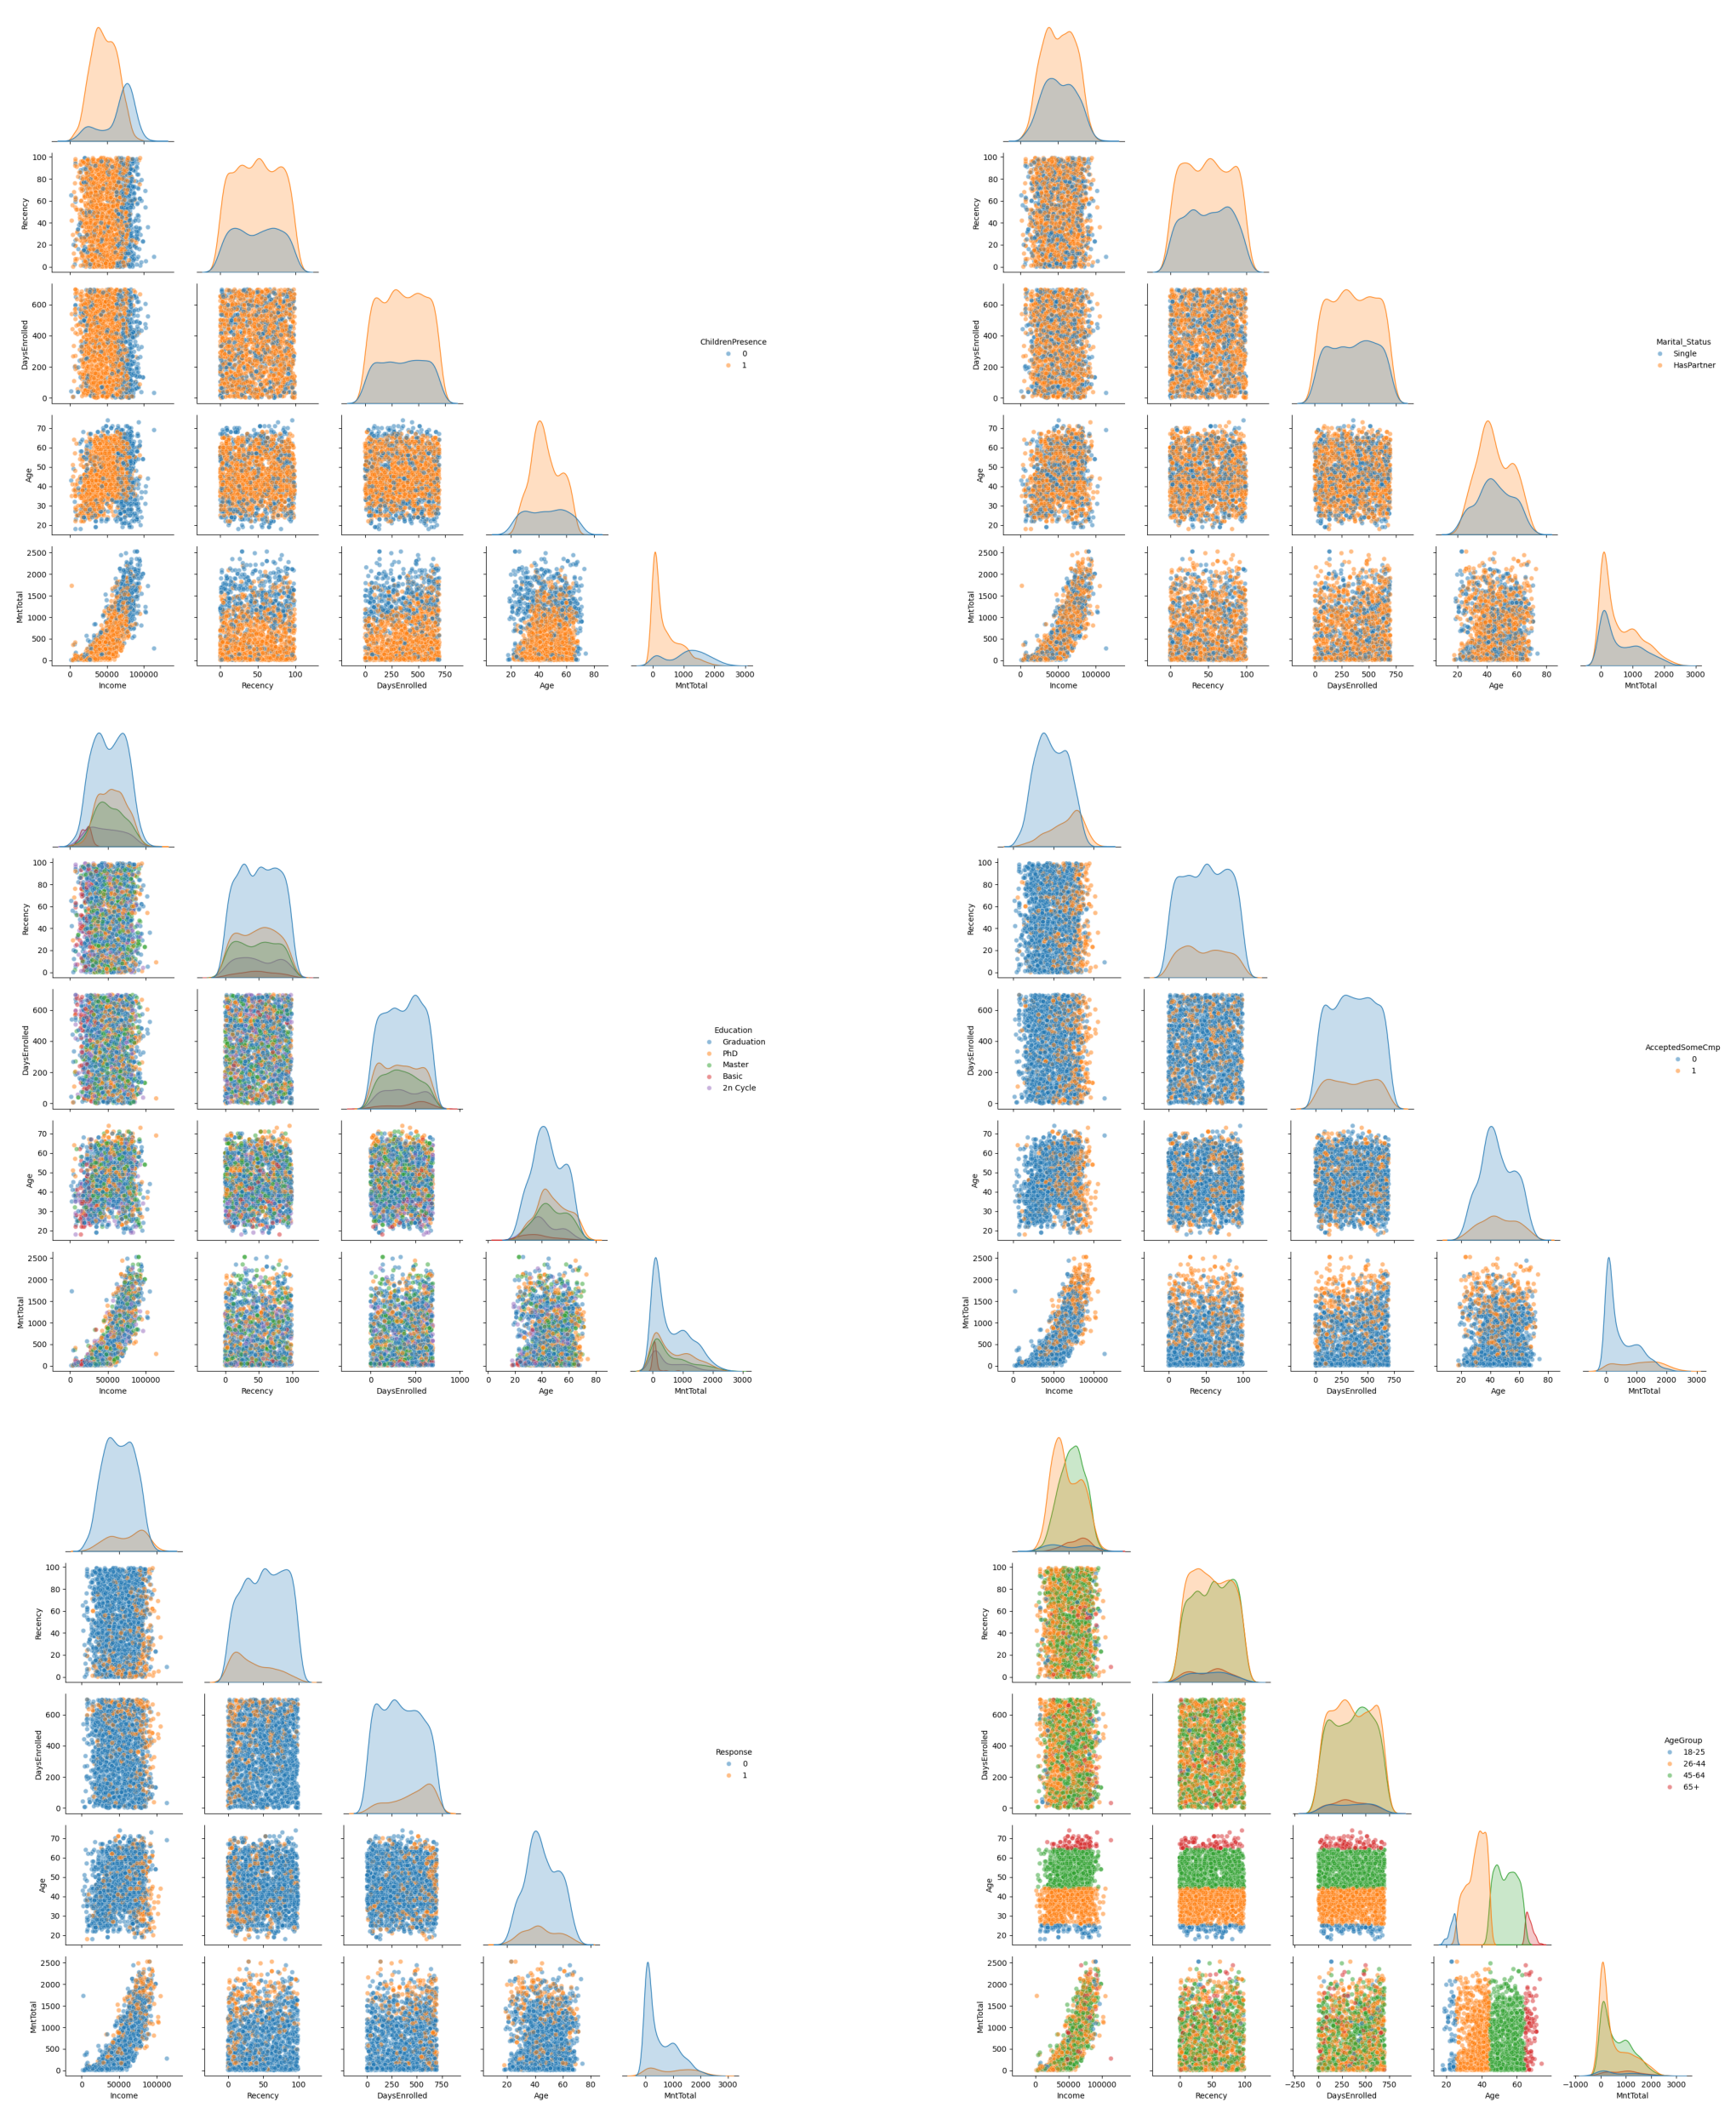

In [38]:
# Create a grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(25, 25))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create pair plots for each hue column and save them to temporary figures
pairplot_images = []
for hue in hue_columns:
    g = sns.pairplot(
        dfi,
        vars=analysis_columns,
        hue=hue,
        diag_kind="kde",
        plot_kws={'alpha': 0.5},
        corner=True
    )
    g.fig.suptitle(hue, y=1.02)  # Add a title to the figure
    pairplot_images.append(g.fig)
    plt.close(g.fig)  # Close the figure to prevent display

# Add the saved pair plot images to the subplots
for ax, img in zip(axes, pairplot_images):
    ax.imshow(img.canvas.buffer_rgba())
    ax.axis('off')  # Hide the axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Based on the pair plots provided, the following observations and insights can be noted for each hue:

ChildrenPresence:
- Income vs. MntTotal: A strong positive correlation exists regardless of the presence of children.
- Distributions: The presence of children slightly lower the income distribution, but overall spending patterns remain similar.
- Recency, Days Enrolled, Age: No significant impact of children presence on these variables.
- Customers without children tend to have higher incomes.

Marital Status:
- Income vs. MntTotal: Consistent positive correlation across both single and partnered individuals.
- Age: Both singles and partnered individuals show similar age trends, but partnered individuals have a slightly wider age range in higher income brackets.
- Income, Recency, Days Enrolled, MntTotal: There are no major differences between singles and those with partners.

Education:
- Income vs. MntTotal: Positive correlation observed across education levels, with higher spending as income increases.
- Recency, Days Enrolled: Uniformly distributed across education levels, indicating consistent engagement.
- Age: Older individuals tend to have higher education levels.
- MntTotal: Those with higher education levels have higher incomes and spending patterns, while those with basic education tend to spend less and lower income.

AcceptedSomeCmp:
- Income vs. MntTotal: Positive correlation persists, with those who accepted campaigns slightly skewed towards higher spending.
- Income: Customers with higher incomes are more likely to accept a marketing campaign.
- MntTotal: Those who accepted campaigns tend to have slightly higher total spending, reinforcing the link between income and spending.

Response:
- Income vs. MntTotal: Similar positive correlation across both respondents and non-respondents.
- MntTotal: Respondents tend to have slightly higher total spending, which is also related to higher income levels.
- Recency: shows a peak in the lowest values, indicating recent customers responded positively, suggesting frequent buyers are more likely to respond favorably.
- DaysEnrolled: Long-term customers also tend to respond favorably to the pilot campaign.

AgeGroup:
- Income vs. MntTotal: Positive correlation seen across all age groups, with higher income leading to higher spending.
- Age Distribution: Clear age group segmentation, with distinct bands visible in the scatter plots.
- MntTotal: Higher age groups (45-64, 65+) tend to have higher spending, while younger groups (18-25, 26-44) show varied spending patterns.
- The 45-64 age group has higher income peaks compared to the 25-44 group, aligning with the expectation that older individuals have higher incomes.

## Boxplots

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum. Boxplots are useful for identifying outliers, understanding the spread of the data, and comparing distributions across different groups.

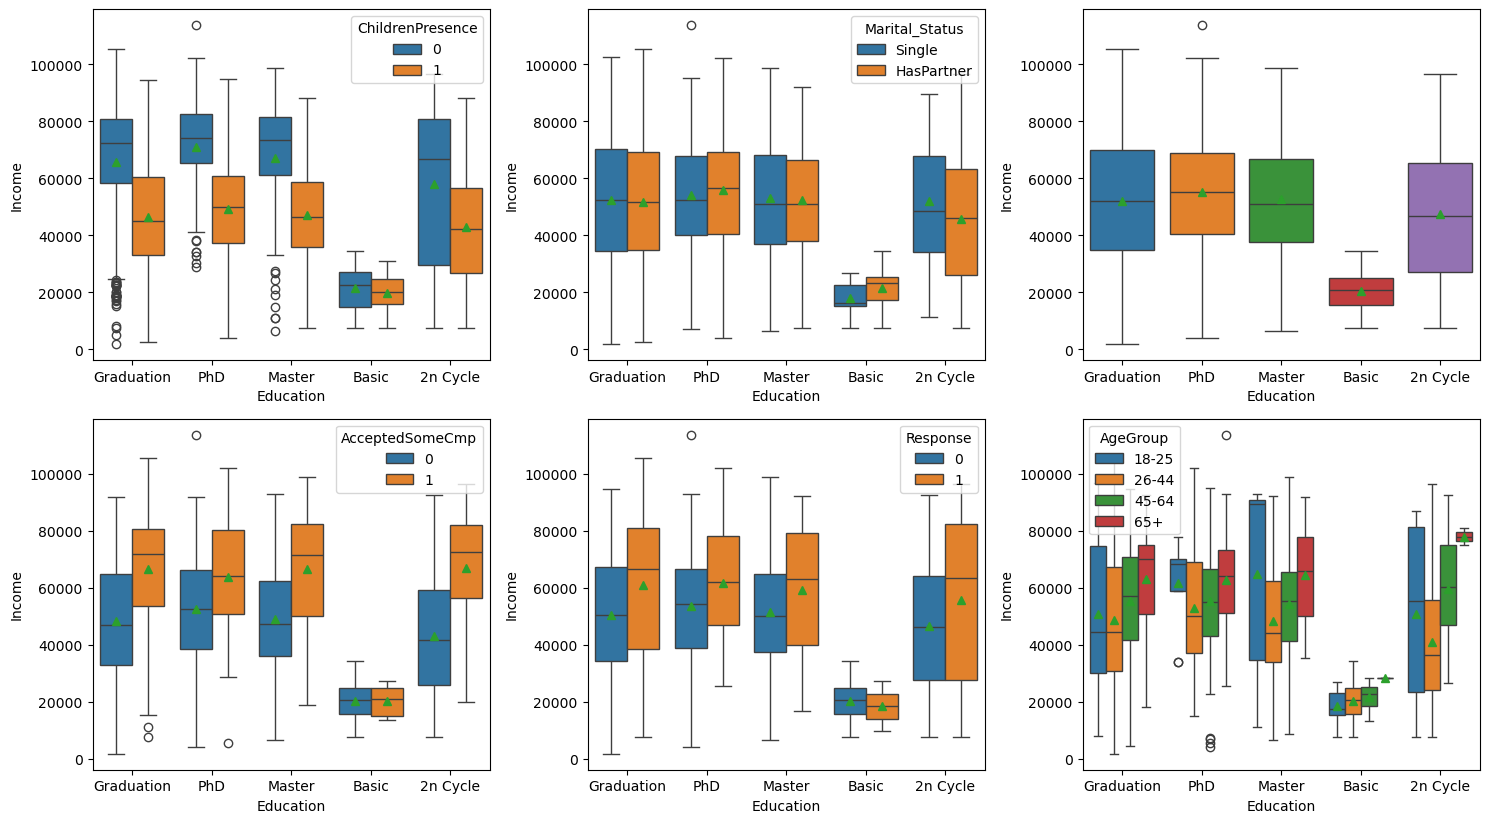

In [39]:
def create_boxplot_grid(dataframe, x_col, y_col, hue_columns, grid_size=(3, 3), figsize=(15, 12)):
    """
    Create a grid of boxplots for specified hue columns.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to use for plotting.
    x_col (str): The column name to use for the x-axis.
    y_col (str): The column name to use for the y-axis.
    hue_columns (list): List of column names to use for color encoding.
    grid_size (tuple): The size of the grid (rows, cols).
    figsize (tuple): The size of the figure.

    Returns:
    None
    """
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for ax, hue in zip(axes, hue_columns):
        sns.boxplot(x=x_col, y=y_col, data=dataframe, showmeans=True, hue=hue, ax=ax)

    # Remove any empty subplots
    for i in range(len(hue_columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Create the grid of boxplots based in the same hue columns from pairplots
create_boxplot_grid(dfi, "Education", "Income", hue_columns)

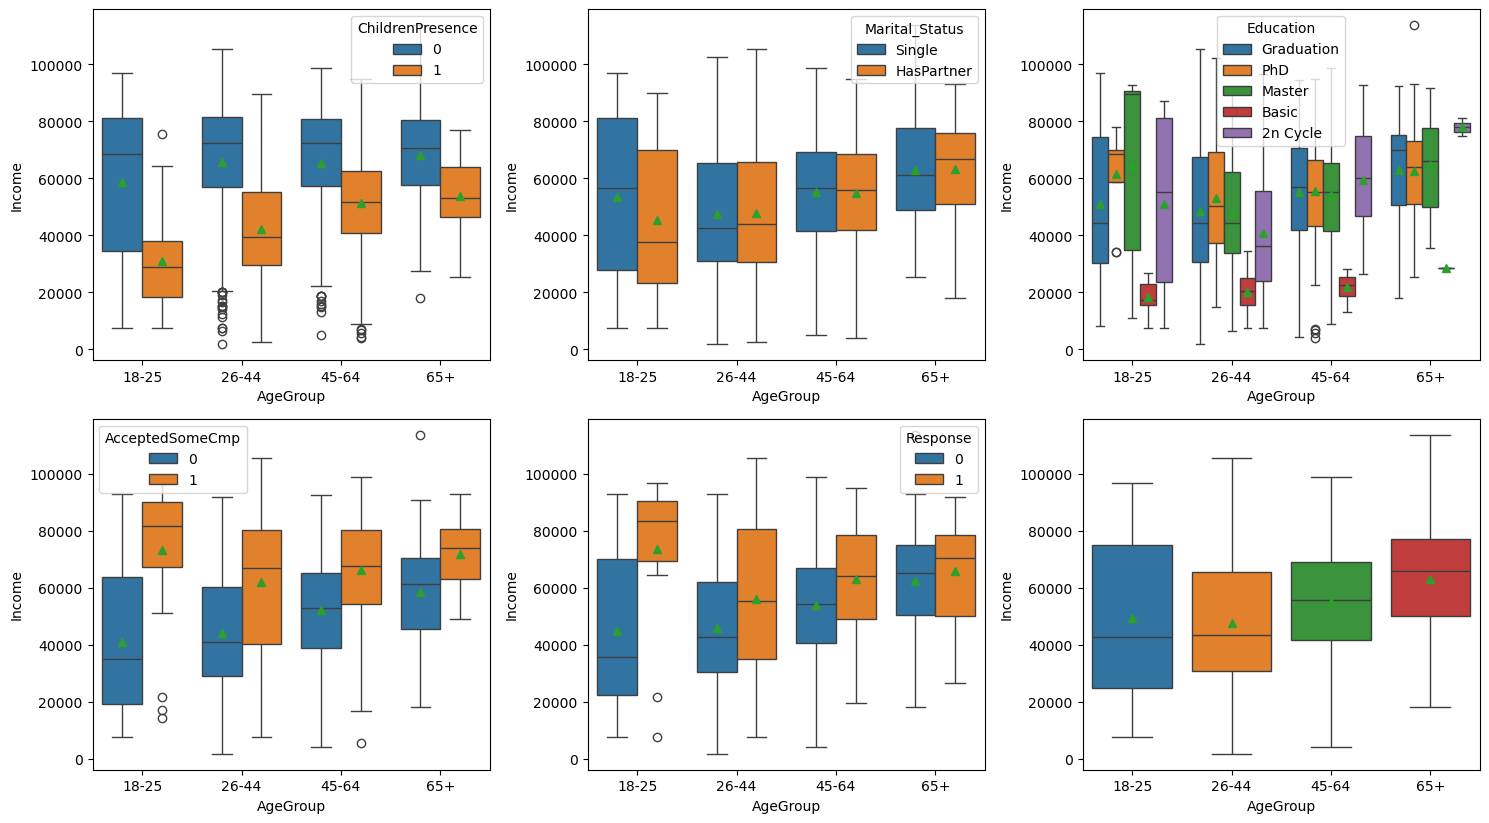

In [40]:
# Create the grid of boxplots based in the same hue columns from pairplots
create_boxplot_grid(dfi, "AgeGroup", "Income", hue_columns)

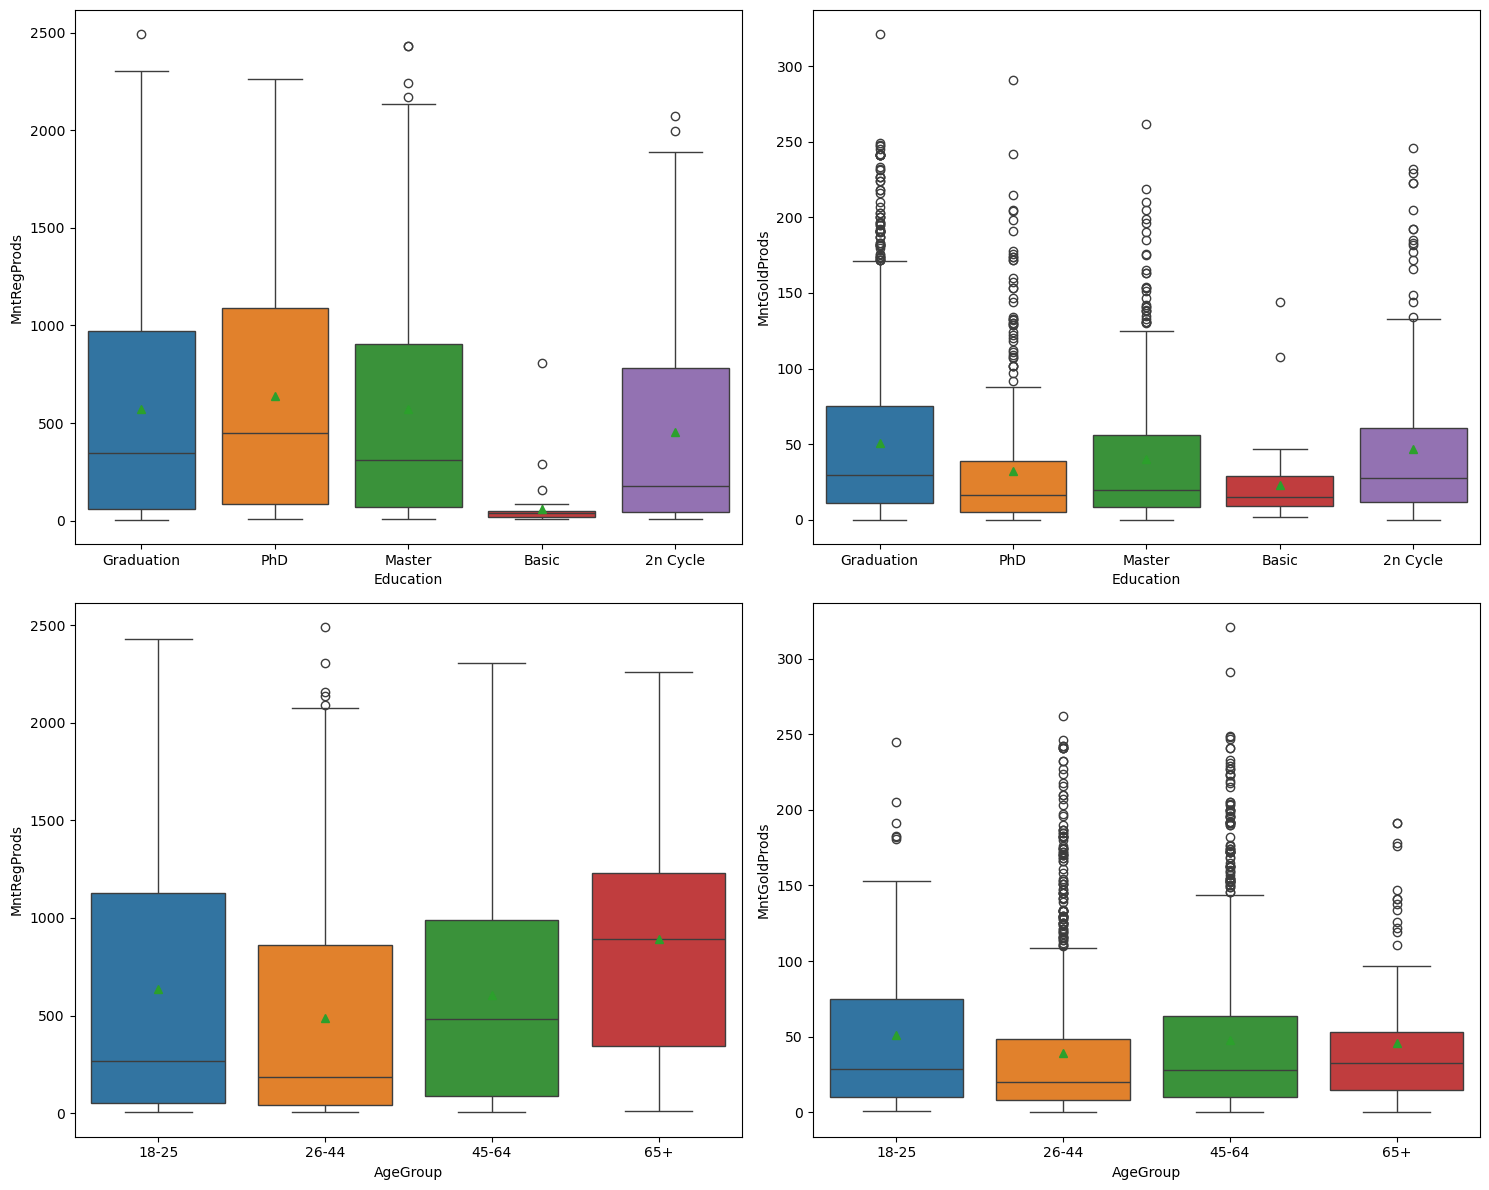

In [41]:
# Create 2x2 grid of boxplots related to Regular and Gold Products
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1
sns.boxplot(x="Education", y="MntRegProds", data=dfi, showmeans=True, hue="Education", ax=axes[0, 0])

# Plot 2
sns.boxplot(x="Education", y="MntGoldProds", data=dfi, showmeans=True, hue="Education", ax=axes[0, 1])

# Plot 3
sns.boxplot(x="AgeGroup", y="MntRegProds", data=dfi, showmeans=True, hue="AgeGroup", ax=axes[1, 0])

# Plot 4
sns.boxplot(x="AgeGroup", y="MntGoldProds", data=dfi, showmeans=True, hue="AgeGroup", ax=axes[1, 1])

plt.tight_layout()
plt.show()

These visualizations confirmed the trends observed in the pair plots:
- Children Presence: Customers with children generally had lower incomes across all education levels.
- Marital Status: Not correlated with income levels.
- Education: Higher education levels correlate with higher incomes.
- Income Trends: Higher incomes observed in households without children.
- Spending Behavior: Higher education levels correlate with increased spending on regular products.

## Correlation Between Variables

#### Creating Dummy Variables

Creating dummy variables is a key step when exploring the correlation between categorical variables and other variables (either categorical or continuous) in a dataset. Dummy variables allow to convert categorical data into a numerical format that can be easily analys
ed, particularly for computing correlations, which require numerical input.

In [42]:
# Convert categorical variables to dummy variables
dfi_dum = pd.get_dummies(dfi)
dfi_dum.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0 58138.00        0         0       58       635         88              546   
1 46344.00        1         1       38        11          1                6   
2 71613.00        0         0       26       426         49              127   
3 26646.00        1         0       26        11          4               20   
4 58293.00        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  DaysEnrolled  YearsEnrolled  Age  MntTotal  \
0         0         1           663              1   57      1617   
1         0         0           113              0   60        27   
2         0         0           312              0   49       776   
3         0         0           139              0   30        53   
4         0         0           161              0   33       422   

   MntRegProds  NbChildren  ChildrenPresence  AcceptedCmpTotal  \
0         1529           0                 0                 0   
1           21           2                 1                 0   
2          734           0                 0                 0   
3           48           1                 1                 0   
4          407           1                 1                 0   

   AcceptedSomeCmp  NumTotalPurchases  Education_2n Cycle  Education_Basic  \
0                0                 22               False            False   
1                0                  4               False            False   
2                0                 20               False            False   
3                0                  6               False            False   
4                0                 14               False            False   

   Education_Graduation  Education_Master  Education_PhD  \
0                  True             False          False   
1                  True             False          False   
2                  True             False          False   
3                  True             False          False   
4                 False             False           True   

   Marital_Status_HasPartner  Marital_Status_Single  AgeGroup_18-25  \
0                      False                   True           False   
1                      False                   True           False   
2                       True                  False           False   
3                       True                  False           False   
4                       True                  False           False   

   AgeGroup_26-44  AgeGroup_45-64  AgeGroup_65+  
0           False          

In [43]:
dfi_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2205 non-null   float64
 1   Kidhome                    2205 non-null   int64  
 2   Teenhome                   2205 non-null   int64  
 3   Recency                    2205 non-null   int64  
 4   MntWines                   2205 non-null   int64  
 5   MntFruits                  2205 non-null   int64  
 6   MntMeatProducts            2205 non-null   int64  
 7   MntFishProducts            2205 non-null   int64  
 8   MntSweetProducts           2205 non-null   int64  
 9   MntGoldProds               2205 non-null   int64  
 10  NumDealsPurchases          2205 non-null   int64  
 11  NumWebPurchases            2205 non-null   int64  
 12  NumCatalogPurchases        2205 non-null   int64  
 13  NumStorePurchases          2205 non-null   int64  
 1

In [44]:
# Save the DataFrame with dummy variables to a CSV file
dfi_dum.to_csv("../data/ml_project_data_clean_dummies.csv", index=False)

#### Exploring Correlations

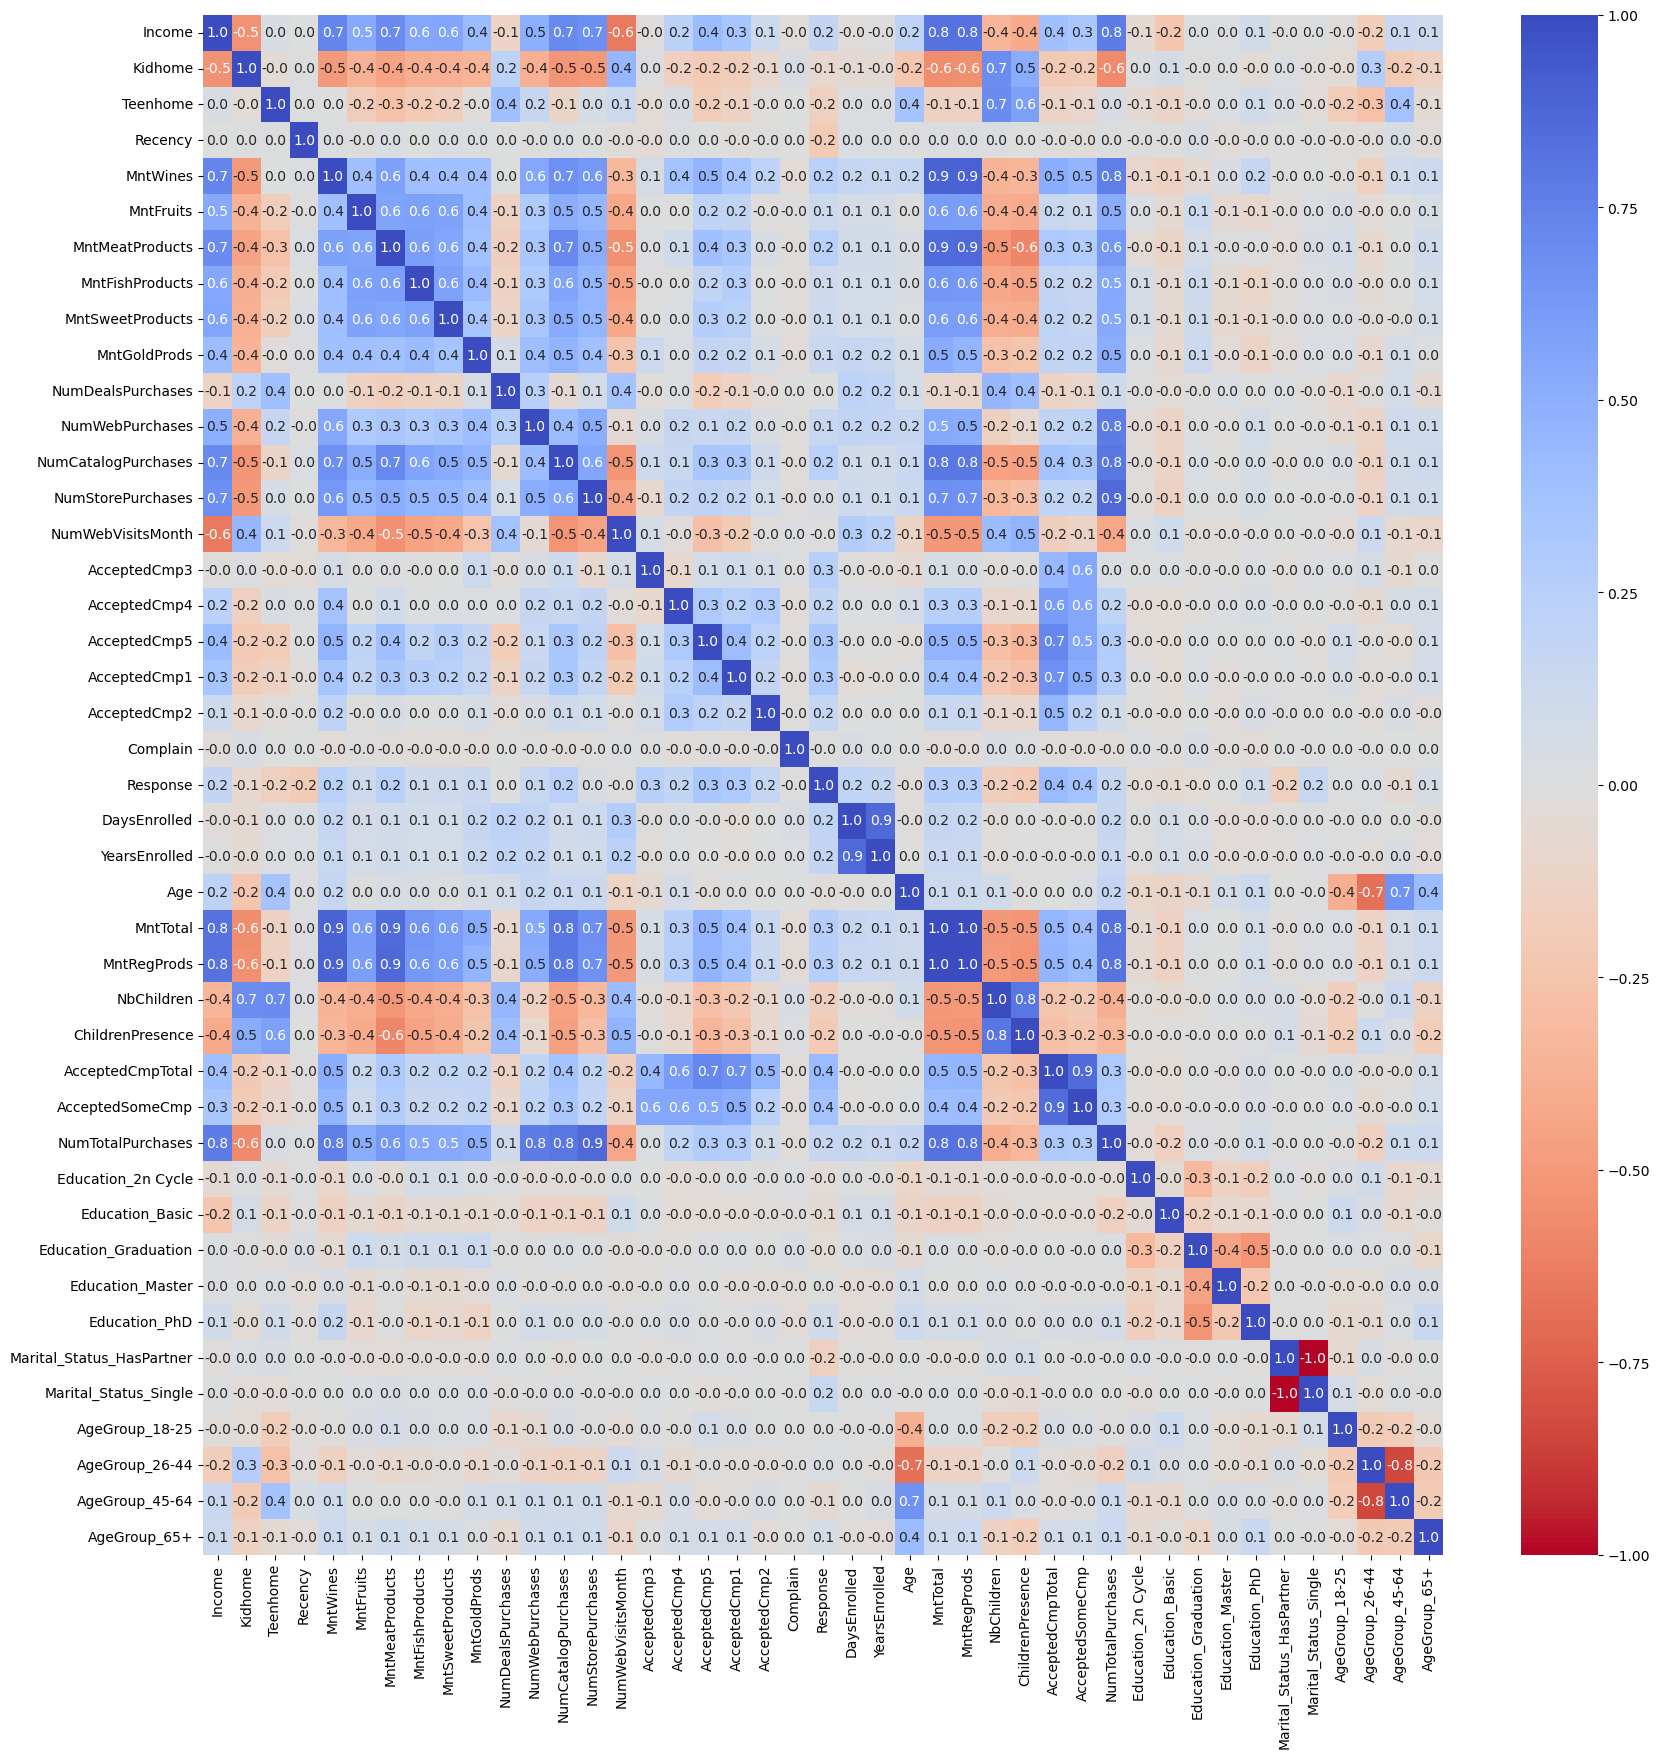

In [45]:
# Creating a variable to store the correlation
dfi_dum_corr = dfi_dum.corr()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Create a heatmap of the correlation matrix
sns.heatmap(
    dfi_dum_corr,        
    annot=True,          
    fmt=".1f",       
    cmap="coolwarm_r",  
    ax=ax               
)

plt.show()

In [46]:
# Unstack the correlation matrix into a DataFrame
dfi_dum_corr_unstack = pd.DataFrame(dfi_dum_corr.unstack())

# Rename the column for clarity
dfi_dum_corr_unstack = dfi_dum_corr_unstack.rename(columns={0: "corr"})

# Filter the DataFrame for correlations with 'Response' and sort them
response_corr = dfi_dum_corr_unstack.loc["Response"].sort_values(by="corr")[:-1]

# Display the sorted correlations with 'Response'
response_corr

corr
ChildrenPresence          -0.21
Recency                   -0.20
NbChildren                -0.17
Teenhome                  -0.16
Marital_Status_HasPartner -0.15
Kidhome                   -0.08
AgeGroup_45-64            -0.06
Education_Basic           -0.05
Education_Graduation      -0.04
Education_2n Cycle        -0.04
Age                       -0.02
NumWebVisitsMonth         -0.01
Complain                  -0.00
Education_Master           0.00
NumDealsPurchases          0.00
AgeGroup_18-25             0.01
AgeGroup_26-44             0.03
NumStorePurchases          0.03
AgeGroup_65+               0.05
Education_PhD              0.09
MntFishProducts            0.11
MntSweetProducts           0.12
MntFruits                  0.12
MntGoldProds               0.14
NumWebPurchases            0.15
Marital_Status_Single      0.15
NumTotalPurchases          0.16
AcceptedCmp2               0.17
YearsEnrolled              0.17
Income                     0.17
AcceptedCmp4               0.18
DaysEnrolled               0.20
NumCatalogPurchases        0.23
MntWines                   0.25
MntMeatProducts            0.25
AcceptedCmp3               0.25
MntRegProds                0.26
MntTotal                   0.27
AcceptedCmp1               0.30
AcceptedCmp5               0.32
AcceptedSomeCmp            0.37
AcceptedCmpTotal           0.43

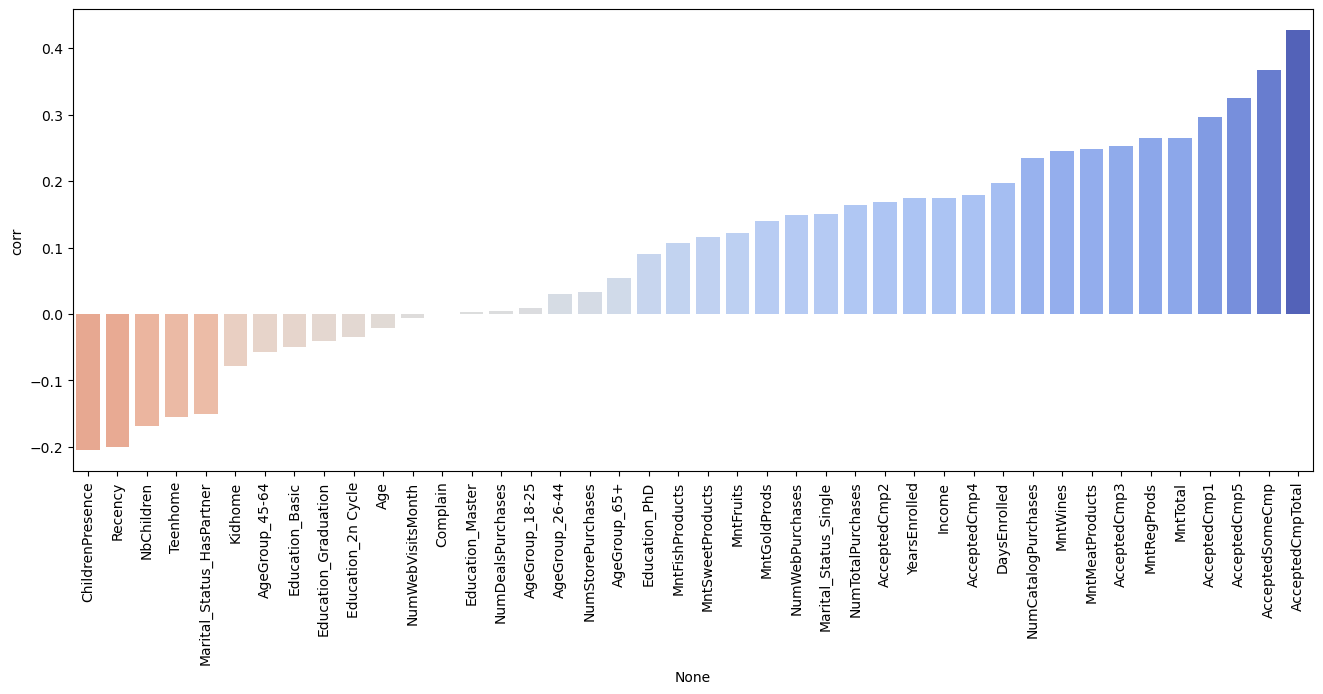

In [47]:
from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

# Define colormap and normalization
cmap = "coolwarm_r"
cnorm = CenteredNorm(vcenter=0, halfrange=0.45)
smap = ScalarMappable(norm=cnorm, cmap=cmap)

# Create a list of colors based on the correlation values
listed_colours = ListedColormap([smap.to_rgba(x) for x in response_corr["corr"]]).colors

# Create the figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the barplot
barplot = sns.barplot(
    x=response_corr.index, 
    y=response_corr["corr"], 
    palette=listed_colours, 
    hue=response_corr.index, 
    dodge=False,
    ax=ax
)

# Rotate x-axis labels for better readability
barplot.tick_params(axis="x", rotation=90)

# Show the plot
plt.show()

By analyzing the correlations, several key insights can be derived:

Income: 
- NumWebVisits: More visits correlate with lower income.
- ChildrenPresence: Higher income tends to correlate with fewer children at home, confirming earlier conclusions.
- Education_Basic: Lower income is linked to basic education.
- MntTotal, Other Mnts, NumTotalPurchases: Higher income leads to more purchases and higher spending, especially on regular products.
- Campaigns: Higher income correlates with higher campaign acceptance.

Response:
- Income: Higher income levels slightly increase the likelihood of a positive response.
- Recency: More recent purchases correlate with higher conversion rates in the pilot campaign.
- Time Enrolled: Longer enrollment correlates with higher conversion rates.
- ChildrenPresence: Having children reduces conversion likelihood.
- Marital Status: Having a partner reduces conversion likelihood.
- Campaigns: Acceptance of multiple campaigns significantly increases the likelihood of a positive response.
- High Spending: Higher spending correlates with higher conversion rates.